<a href="https://colab.research.google.com/github/joaolucascv/consumodecervejaEBAC/blob/main/Projeto_de_Parceria_M25_Jo%C3%A3o_Lucas_Carrijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto de Parceria** | Análise de Dados: O consumo de cerveja na cidade de São Paulo


### João Lucas Carrijo - https://www.linkedin.com/in/joaolucascv07/
---

# **Tópicos**

<ol type="1">
  <li>Coleta de dados;</li>
  <li>Modelagem;</li>
  <li>Conclusão;</li>

</ol>

---

## **1. Coleta de Dados**

Neste exercício, vamos utilizar uma base de dados com informações sobre o consumo de cerveja e as condições climáticas, temperatura e chuva, em uma determinada região do país. Os dados (amostra) foram coletados em **São Paulo — Brasil**, em uma área universitária, onde ocorrem algumas festas com grupos de estudantes de **18 a 28 anos** (média).

O objetivo deste trabalho é relacionar os padrão de consumo de cerveja (variável dependente) com as condições climáticas do local, temperatura ambiente e chuva (variáveis preditivas).

No final vamos responder a questão abaixo:

**Qual seria aproximadamente o consumo de cerveja na região da amostra em um dia com as seguintes condições:**

Temperatura Média (°C) = 24.64

Temperatura Mínima (°C) = 20.40

Temperatura Máxima (°C) = 31.40

Precipitação (mm) = 0.60



In [1]:
#Importando as bibliotecas necessárias

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
#Vamos conhecer um pouco o conjunto dos dados

consumo_cheio = pd.read_csv('/content/Consumo_cerveja.csv',
                      names=['data','temp_media','temp_min','temp_max',
                        'chuva','finaldesemana','consumo_cerveja'], header=0, decimal=',')

#Descartando a coluna data e finaldesemana pois elas não serão importante para esse projeto

consumo = consumo_cheio.drop(['data','finaldesemana'], axis=1)

consumo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_media       365 non-null    float64
 1   temp_min         365 non-null    float64
 2   temp_max         365 non-null    float64
 3   chuva            365 non-null    float64
 4   consumo_cerveja  365 non-null    object 
dtypes: float64(4), object(1)
memory usage: 36.9+ KB


In [4]:
#Alterando o tipo das variável consumo_cerveja para inteiro e excluindo os dados faltantes

consumo['consumo_cerveja'] = consumo['consumo_cerveja'].astype('float')
consumo.dropna(inplace=True)

consumo.head(5)

,temp_media,temp_min,temp_max,chuva,consumo_cerveja
0,27.30,23.9,32.5,0.0,25.461
1,27.02,24.5,33.5,0.0,28.972
2,24.82,22.4,29.9,0.0,30.814
3,23.98,21.5,28.6,1.2,29.799
4,23.82,21.0,28.3,0.0,28.900


In [5]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_media       365 non-null    float64
 1   temp_min         365 non-null    float64
 2   temp_max         365 non-null    float64
 3   chuva            365 non-null    float64
 4   consumo_cerveja  365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


**1.1. Analise exploratória**

Nos gráficos abaixo podemos ver a correlação das condições de temperatura, chuva e se é final de semana com o consumo de cerveja.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

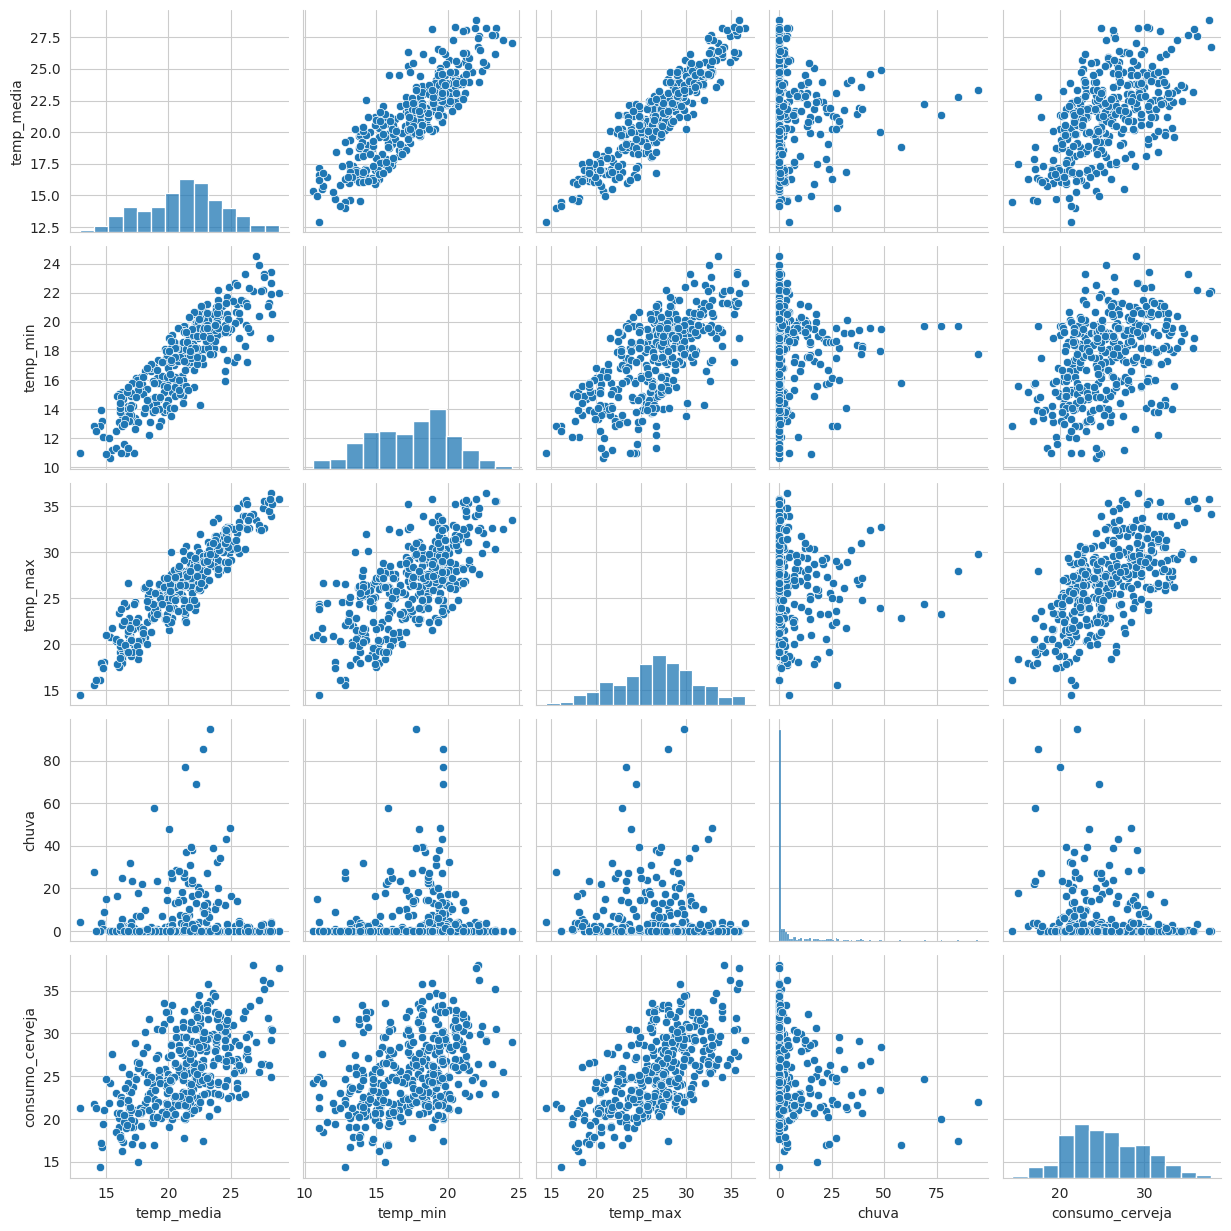

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=consumo, palette="pastel")

**Comentário:** No gráfico acima observamos que existe uma correlação positiva entre as variáveis de temperatura (média, mínima e máxima) e o consumo de cerveja. À medida que a temperatura aumenta, o consumo também aumenta. Já em relação a quantidade de chuva não há uma relação linear clara, mas pode-se observar que em dias sem chuva ou com pouca chuva o consumo tende a ser maior.

Na coluna diagonal podemos observar as distribuições das variáveis onde as temperaturas média, mínima e máxima têm distribuições concentradas em torno de valores intermediários e a chuva é altamente assimétrica, com muitos dias sem chuva ou com baixa precipitação, valores próximos de 0.

**1.2. Dados**

Como as variáveis preditivas são numéricas vou criar novas colunas **padronizando** seus valores. As novas colunas terão o mesmo nome da coluna original acrescidade de "*_std*".

In [7]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_media       365 non-null    float64
 1   temp_min         365 non-null    float64
 2   temp_max         365 non-null    float64
 3   chuva            365 non-null    float64
 4   consumo_cerveja  365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [8]:
# padronizando a variável temp_media
media_temp_media = consumo['temp_media'].mean()
desvio_padrao_temp_media = consumo['temp_media'].std()

consumo['temp_media_std'] = consumo['temp_min'].apply(lambda nota: (nota - media_temp_media) / desvio_padrao_temp_media)

# padronizando a variável temp_min
media_temp_min = consumo['temp_min'].mean()
desvio_padrao_temp_min = consumo['temp_min'].std()

consumo['temp_min_std'] = consumo['temp_min'].apply(lambda nota: (nota - media_temp_min) / desvio_padrao_temp_min)

# padronizando a variável temp_max
media_temp_max = consumo['temp_max'].mean()
desvio_padrao_temp_max = consumo['temp_max'].std()

consumo['temp_max_std'] = consumo['temp_max'].apply(lambda nota: (nota - media_temp_max) / desvio_padrao_temp_max)

# padronizando a variável chuva
media_chuva = consumo['chuva'].mean()
desvio_padrao_chuva = consumo['chuva'].std()

consumo['chuva_std'] = consumo['chuva'].apply(lambda nota: (nota - media_chuva) / desvio_padrao_chuva)

consumo.head()

,temp_media,temp_min,temp_max,chuva,consumo_cerveja,temp_media_std,temp_min_std,temp_max_std,chuva_std
0,27.30,23.9,32.5,0.0,25.461,0.840740,2.278205,1.363909,-0.418487
1,27.02,24.5,33.5,0.0,28.972,1.029413,2.490506,1.595532,-0.418487
2,24.82,22.4,29.9,0.0,30.814,0.369058,1.747455,0.761690,-0.418487
3,23.98,21.5,28.6,1.2,29.799,0.086049,1.429004,0.460580,-0.321852
4,23.82,21.0,28.3,0.0,28.900,-0.071179,1.252087,0.391093,-0.418487


**1.3. Limpeza**

Vou descartar as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*".

In [9]:
consumo = consumo.filter(regex=r'consumo_cerveja|_std$')

consumo.head()

,consumo_cerveja,temp_media_std,temp_min_std,temp_max_std,chuva_std
0,25.461,0.840740,2.278205,1.363909,-0.418487
1,28.972,1.029413,2.490506,1.595532,-0.418487
2,30.814,0.369058,1.747455,0.761690,-0.418487
3,29.799,0.086049,1.429004,0.460580,-0.321852
4,28.900,-0.071179,1.252087,0.391093,-0.418487


## **2\. Modelagem**

### **2.1. Regressão Linear**

**2.1.1. Treino/Teste**

Vamos separar a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


predictors_train, predictors_test, target_train, target_test = train_test_split(
    consumo.drop(['consumo_cerveja'], axis=1),
    consumo['consumo_cerveja'],
    test_size=0.33,
    random_state=123
)

predictors_train.head()


,temp_media_std,temp_min_std,temp_max_std,chuva_std
35,-0.668643,0.579803,-0.859669,0.032476
0,0.840740,2.278205,1.363909,-0.418487
347,-0.039733,1.287471,1.363909,-0.257429
74,-0.825870,0.402886,0.645878,1.385368
157,-1.674898,-0.552466,-0.095314,-0.418487


In [ ]:
predictors_train.shape

(244, 4)

In [ ]:
target_train.head()

,consumo_cerveja
35,19.950
0,25.461
347,28.131
74,20.903
157,30.498


In [ ]:
predictors_test.shape

(121, 4)

**2.1.2. Treino**

Vamos treinar um modelo de regressão linear com os dados do treino (2/3).

In [11]:
model = LinearRegression()
model = model.fit(predictors_train, target_train)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['temp_media_std', 'temp_min_std', 'temp_max_std', 'chuva_std'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([-0.0898561 , -0.10110876,  2.88581698, -0.6025859 ]),
 'rank_': 3,
 'singular_': array([2.39128188e+01, 1.76277766e+01, 9.88281274e+00, 2.48444959e-15]),
 'intercept_': 25.072058230641794}

In [12]:
a = model.coef_
print(a)

b = model.intercept_
print(b)

[-0.0898561  -0.10110876  2.88581698 -0.6025859 ]
25.072058230641794


Calculando o RMSE para o modelo de regressão linear treinado com os dados de teste (1/3).


In [13]:
target_predicted = model.predict(predictors_test)

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

media_consumo_cerveja = consumo['consumo_cerveja'].mean()

print(media_consumo_cerveja)

porcentagem = media_consumo_cerveja / rmse

print(porcentagem)

3.297878320743665
25.40136712328767
7.70233606361793


Como referência, eu consegui um RMSE de aprox. 3.3 mil litros, ou seja 7,7% da média de consumo de cerveja, uma performance razoável.

---



**2.1.3. Predição**

Vamos usar a predição para responder o problema da pesquisa:

Qual seria aproximadamente o consumo de cerveja na região da amostra em um dia com as seguintes condições:

Temperatura Média (°C) = 24.64

Temperatura Mínima (°C) = 20.40

Temperatura Máxima (°C) = 31.40

Precipitação (mm) = 0.60

In [14]:
# Padronizando preditivos numéricos

temp_media_padrao = (24.64 - media_temp_media) / desvio_padrao_temp_media
print(temp_media_padrao)

temp_min_padrao = (20.40 - media_temp_min) / desvio_padrao_temp_min
print(temp_min_padrao)

temp_max_padrao = (31.4 - media_temp_max) / desvio_padrao_temp_max
print(temp_max_padrao)

chuva_padrao = (0.60 - media_chuva) / desvio_padrao_chuva
print(chuva_padrao)

1.073436560926301
1.039786857289734
1.109123797435637
-0.37016992466742094


In [15]:
# aplicando o modelo ao dia de referência

consumo_cerveja_ref = np.array([temp_media_padrao, temp_min_padrao,temp_max_padrao, chuva_padrao])

consumo_predito_dia = model.predict(consumo_cerveja_ref.reshape(1, -1))
print(consumo_predito_dia)

[28.29425932]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


O consumo predito do dia de referência foi 28.30 mil litros de cerveja.

In [16]:
## Comparando com o consumo real do dia 58 que possui as mesmas condições do problema:

consumo_dia_58 = consumo_cheio['consumo_cerveja'].iloc[57]
print(consumo_dia_58)


26.241


In [17]:
variacao = (28.29425932 - 26.241) / 28.29425932

print(variacao)

0.07256805335592008


Demonstramos através da predição que o modelo entrega um resultado com variação aproximada de 7% em relação ao real.

### **2.2. Agrupamento**

A idéia agora  é agrupar os dias de acordo com suas condições climáticas (variáveis preditivas).

In [23]:
#Tirando a variável resposta, as variáveis que não vamos usar e limpando os dados faltantes

condicoes = consumo_cheio.drop(['data','finaldesemana','consumo_cerveja'], axis=1)

condicoes.dropna(inplace=True)

condicoes.head(5)

,temp_media,temp_min,temp_max,chuva
0,27.30,23.9,32.5,0.0
1,27.02,24.5,33.5,0.0
2,24.82,22.4,29.9,0.0
3,23.98,21.5,28.6,1.2
4,23.82,21.0,28.3,0.0


**2.2.1. Analise exploratória**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

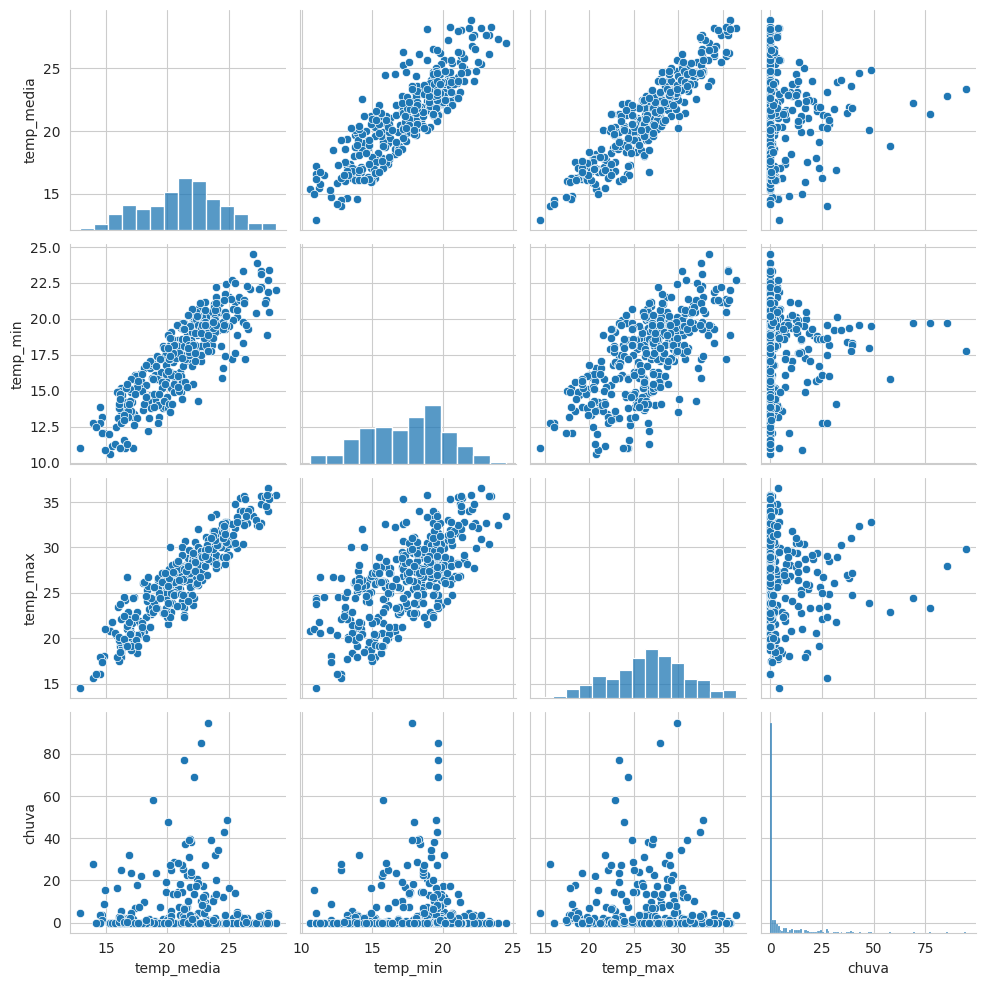

In [24]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=condicoes, palette="pastel")

**Comentários:** Olhando para o gráfico da correlação entre as variáveis preditivas podemos afirmar que existe uma forte correlação linear entre as temperaturas mínima, média e máxima, o que é esperado, já que essas variáveis estão relacionadas. Em relação a chuva, observamos uma correlação onde os dias mais chuvosos tendem a ter menores temperaturas e os mais secos serem mais quentes.

**2.2.2. Treino K-Médias**

In [25]:
#Vamos treinar 10 modelos de k-médias variando o número de clusters de 1 a 10.
#Para cada modelo treinado, vou salvar o valor global do **wcss** em uma lista.

from sklearn.cluster import KMeans

data = condicoes

wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(data)
  wcss.append(model.inertia_)

<ipython-input-26-0b115859bbc9>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")


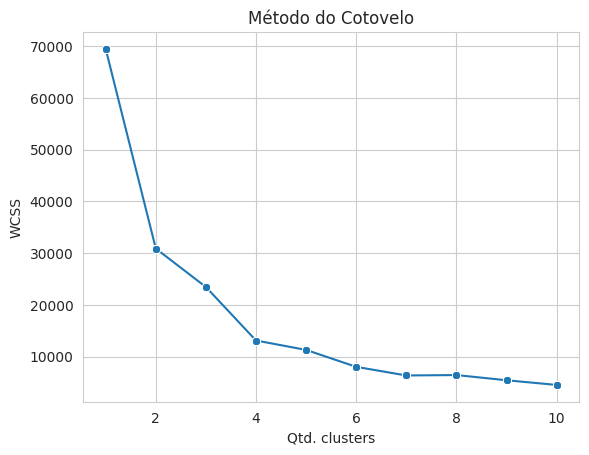

In [26]:
#Gerando um gráfico de linha dos valores do wcss pelo número de clusters.

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

Através do método cotovelo podemos definir que o número de clusters **ideal é 2**.

**2.2.3. Visualização**

In [39]:
#Utilizando o número de clusters final, adicionei uma coluna chamada cluster no dataframe condições

model = KMeans(n_clusters=2)
model = model.fit(data)

model.__dict__

{'n_clusters': 2,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['temp_media', 'temp_min', 'temp_max', 'chuva'], dtype=object),
 'n_features_in_': 4,
 '_tol': 0.0047604942393694805,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 1,
 'cluster_centers_': array([[21.14411765, 17.85882353, 25.95588235, 37.27941176],
        [21.23480363, 17.42054381, 26.67885196,  1.90120846]]),
 '_n_features_out': 2,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
  

In [40]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])

clustered_data = pd.concat([data, clusters], axis=1)
clustered_data.head()

,temp_media,temp_min,temp_max,chuva,cluster
0,27.30,23.9,32.5,0.0,1
1,27.02,24.5,33.5,0.0,1
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,1


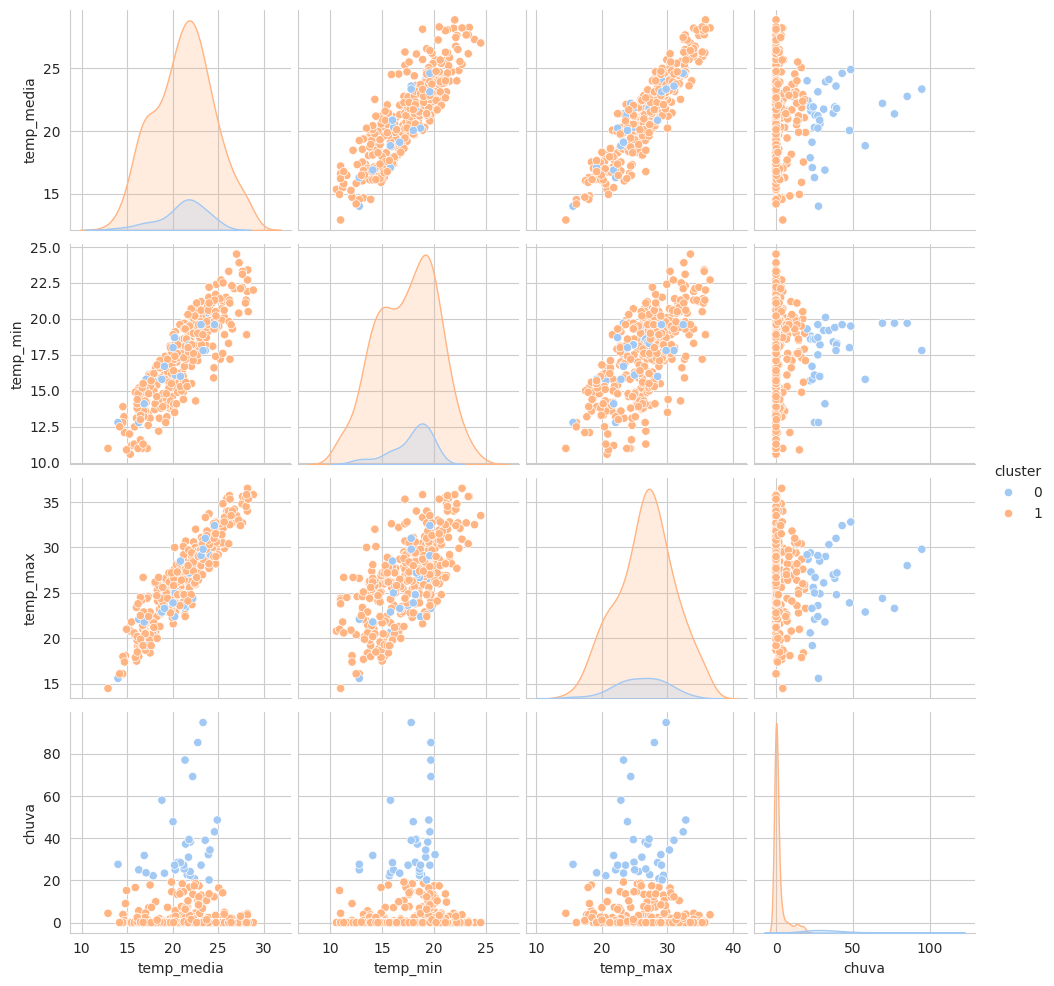

In [41]:
# Nova visualização agora passando como atributo hue a coluna cluster

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

**Comentário:** Separando os **2 clusters** podemos comprovar a hipótese do item 2.2.1 onde observamos a correlação entre as temperaturas e as chuvas, onde o **cluster 0** representa os dias secos com chuva 0 mm ou próximo de 0 e altas temperaturas e os dias do **cluster 1**, chuvosos e com temperaturas mais amenas.

**2.2.4. Predição**

**Em qual cluster estaria alocado o dia do problema de pesquisa, com as seguintes condições?**

Temperatura Média (°C) = 24.64

Temperatura Mínima (°C) = 20.40

Temperatura Máxima (°C) = 31.40

Precipitação (mm) = 0.60


In [42]:
condicoes_dia = np.array([24.64, 20.40, 31.40, 0.60])

cluster = model.predict(condicoes_dia.reshape(1, -1))
print(cluster)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---

Esse dia estaria alocado no **cluster 1** com temperaturas mais altas e baixo índice de precipitação.

## **3. Conclusões**


Por fim, concluímos respondendo ao problema de pesquisa:

 **Qual seria aproximadamente o consumo de cerveja na região da amostra em um dia com as seguintes condições?**

Temperatura Média (°C) = 24.64

Temperatura Mínima (°C) = 20.40

Temperatura Máxima (°C) = 31.40

Precipitação (mm) = 0.60

O consumo seria aproximadamente 28.3 mil litros de cerveja.
Com esse modelo podemos prever e ajudar o comércio de venda de cerveja dessa região a pensar estratégico a distribuição de cerveja, dependendo da época do ano e dos dados metereológicos.

Além disso, através do estudos dos clusters podemos chegar a uma correlação forte entre as variáveis e entender melhor o clima dessa região, com invernos secos e com baixas temperaturas e verões úmidos com muitas chuvas.